# Racing for unbalanced methods selection

### However no technique appears to work consistently better in all conditions.

In [26]:
import numpy as np
import pandas as pd

In [27]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [28]:
from awesome_functions import *
import warnings
warnings.simplefilter('ignore')

In [29]:
train_df = make_df_we_wanted(train_df,train_df,test_df,is_use_positive_scancount_only=True,is_need_null_column=True)

##### Dummy타입으로 만든 컬럼 명 : DepartmentDescription

##### ScanCount는 양수만 사용

##### Train df 만드는 중

##### Null 컬럼을 만듬

> 위 정보들을 Display하는 이유는 이번 FeatureMatrix를 사용한 모델에 Fit할 Test 모델 만들 때 같은 전처리를 하기 위해서다.

In [30]:
train_X,train_y = get_df_to_fit(train_df)

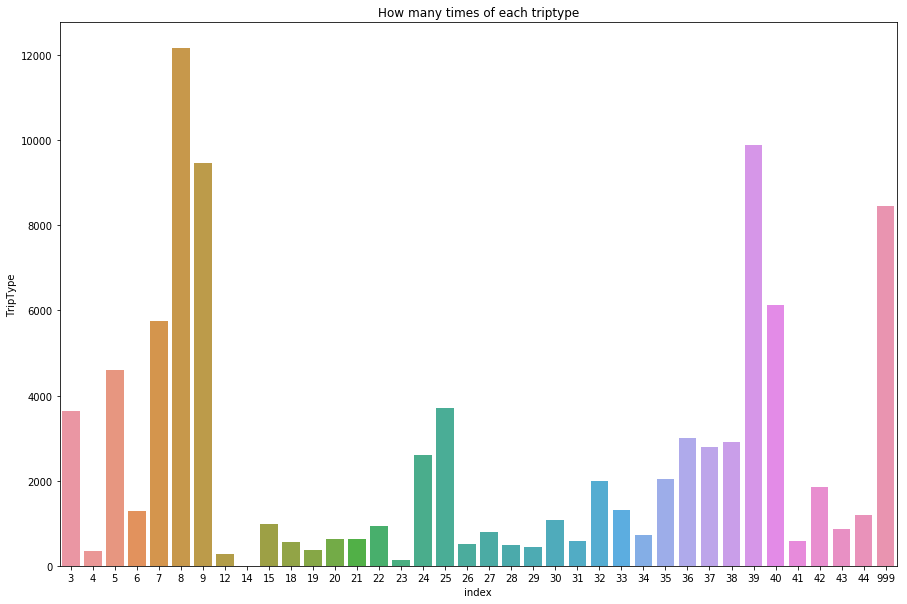

In [31]:
import matplotlib.pylab as plt
import seaborn as sns
TripType_df = train_df['TripType'].value_counts().sort_values().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(TripType_df['index'],TripType_df['TripType'])
plt.title('How many times of each triptype')
plt.show()

# Under Sampling
- RandomUnderSampler: random under-sampling method
- TomekLinks: Tomek’s link method
- CondensedNearestNeighbour: condensed nearest neighbour method
- OneSidedSelection: under-sampling based on one-sided selection method
- EditedNearestNeighbours: edited nearest neighbour method
- NeighbourhoodCleaningRule: neighbourhood cleaning rule

## Orgin train data

In [32]:
from sklearn.naive_bayes import MultinomialNB

In [33]:
model = MultinomialNB().fit(train_X,train_y)

In [34]:
from sklearn.metrics import classification_report , accuracy_score
accuracy_score(train_y,model.predict(train_X))

0.5804607312331459

In [35]:
np.mean(cross_val_score(model,train_X,train_y,cv=kfold,scoring='accuracy'))

0.5774192060535571

## RandomUnderSampler

In [36]:
from imblearn.under_sampling import *

In [37]:
train_X_ib1,train_y_ib1 = RandomUnderSampler(random_state=0).fit_sample(train_X,train_y)

In [38]:
model1 = MultinomialNB().fit(train_X_ib1,train_y_ib1)

In [39]:
accuracy_score(train_y_ib1,model.predict(train_X_ib1))

0.47368421052631576

In [40]:
np.mean(cross_val_score(model1,train_X_ib1,train_y_ib1,cv=kfold,scoring='accuracy'))

0.04

## TomekLinks

In [41]:
train_X_ib2,train_y_ib2 = TomekLinks(random_state=0).fit_sample(train_X,train_y)

In [42]:
model2 = MultinomialNB().fit(train_X_ib2,train_y_ib2)

In [43]:
accuracy_score(train_y_ib2,model2.predict(train_X_ib2))

0.591683856258821

In [44]:
np.mean(cross_val_score(model2,train_X_ib2,train_y_ib2,cv=kfold,scoring='accuracy'))

0.5881228965367494

## CondensedNearestNeighbour

In [45]:
train_X_ib3,train_y_ib3 = CondensedNearestNeighbour(random_state=0).fit_sample(train_X,train_y)

In [46]:
model3 = MultinomialNB().fit(train_X_ib3,train_y_ib3)

In [47]:
accuracy_score(train_y_ib3,model3.predict(train_X_ib3))

0.4323607427055703

In [48]:
np.mean(cross_val_score(model3,train_X_ib3,train_y_ib3,cv=kfold,scoring='accuracy'))

0.008036984352773826

## OneSidedSelection

In [49]:
train_X_ib4,train_y_ib4 = OneSidedSelection(random_state=0).fit_sample(train_X,train_y)

/home/hskimim/anaconda3/lib/python3.6/site-packages/imblearn/under_sampling/prototype_selection/one_sided_selection.py:197: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  idx_maj_extracted = np.delete(idx_maj, idx_maj_sample, axis=0)
/home/hskimim/anaconda3/lib/python3.6/site-packages/imblearn/under_sampling/prototype_selection/one_sided_selection.py:197: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  idx_maj_extracted = np.delete(idx_maj, idx_maj_sample, axis=0)
/home/hskimim/anaconda3/lib/python3.6/site-packages/imblearn/under_sampling/prototype_selection/one_sided_selection.py:197: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  idx_maj_extracted = np.delete(idx_maj, idx_maj_sample, axis=0)
/home/hskimim/anaconda3/lib/python3.6/site-packages/imblearn/under_sampli

/home/hskimim/anaconda3/lib/python3.6/site-packages/imblearn/under_sampling/prototype_selection/one_sided_selection.py:197: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  idx_maj_extracted = np.delete(idx_maj, idx_maj_sample, axis=0)
/home/hskimim/anaconda3/lib/python3.6/site-packages/imblearn/under_sampling/prototype_selection/one_sided_selection.py:197: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  idx_maj_extracted = np.delete(idx_maj, idx_maj_sample, axis=0)
/home/hskimim/anaconda3/lib/python3.6/site-packages/imblearn/under_sampling/prototype_selection/one_sided_selection.py:197: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  idx_maj_extracted = np.delete(idx_maj, idx_maj_sample, axis=0)
/home/hskimim/anaconda3/lib/python3.6/site-packages/imblearn/under_sampli

In [50]:
model4=  MultinomialNB().fit(train_X_ib4,train_y_ib4)

In [51]:
accuracy_score(train_y_ib4,model4.predict(train_X_ib4))

0.66126013724267

In [52]:
np.mean(cross_val_score(model4,train_X_ib4,train_y_ib4,cv=kfold,scoring='accuracy'))

0.4452900810979413

## EditedNearestNeighbours

In [53]:
train_X_ib5,train_y_ib5 = EditedNearestNeighbours(random_state=0).fit_sample(train_X,train_y)

In [54]:
model5 = MultinomialNB().fit(train_X_ib5,train_y_ib5)

In [56]:
accuracy_score(train_y_ib5,model5.predict(train_X_ib5))

0.8912159290960966

In [57]:
from sklearn.model_selection import KFold , cross_val_score
kfold = KFold(10)

In [58]:
%%time
cv = cross_val_score(model5,train_X_ib5,train_y_ib5,scoring='accuracy',cv=kfold,n_jobs=-1)

CPU times: user 412 ms, sys: 71.7 ms, total: 484 ms
Wall time: 1.05 s


In [59]:
np.mean(cv)

0.5288206634954067

## NeighbourhoodCleaningRule

In [60]:
train_X_ib6,train_y_ib6 = NeighbourhoodCleaningRule(random_state=0).fit_sample(train_X,train_y)

In [61]:
model6 = MultinomialNB().fit(train_X_ib6,train_y_ib6)

In [62]:
accuracy_score(train_y_ib6,model6.predict(train_X_ib6))

0.8062062062062062

In [63]:
np.mean(cross_val_score(model6,train_X_ib6,train_y_ib6,cv=kfold,scoring='accuracy'))

0.8017288642784436

# Over Sampling
- RandomOverSampler: random sampler
- ADASYN: Adaptive Synthetic Sampling Approach for Imbalanced Learning
- SMOTE: Synthetic Minority Over-sampling Technique

## RandomOverSampler

In [64]:
from imblearn.over_sampling import *

In [65]:
train_X_ib7,train_y_ib7 = RandomOverSampler(random_state=0).fit_sample(train_X,train_y)

In [66]:
model7 = MultinomialNB().fit(train_X_ib7,train_y_ib7)

In [67]:
accuracy_score(train_y_ib7,model7.predict(train_X_ib7))

0.5932835336429224

In [68]:
np.mean(cross_val_score(model7,train_X_ib7,train_y_ib7,cv=kfold,scoring='accuracy'))

0.40671540990564276

## ADASYN

In [41]:
train_X_ib8,train_y_ib8 = ADASYN(random_state=0).fit_sample(train_X,train_y)

ValueError: No samples will be generated with the provided ratio settings.

In [ ]:
model8 = MultinomialNB().fit(train_X_ib8,train_y_ib8)

In [ ]:
accuracy_score(train_y_ib8,model8.predict(train_X_ib8))

In [ ]:
np.mean(cross_val_score(model8,train_X_ib8,train_y_ib8,cv=kfold,scoring='accuracy'))

## SMOTE

In [42]:
train_X_ib9,train_y_ib9 = SMOTE(random_state=0).fit_sample(train_X,train_y)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 4, n_neighbors = 6

In [ ]:
model9 = MultinomialNB().fit(train_X_ib9,train_y_ib9)

In [ ]:
accuracy_score(train_y_ib9,model9.predict(train_X_ib9))

In [ ]:
np.mean(cross_val_score(model1,train_X_ib1,train_y_ib1,cv=kfold,scoring='accuracy'))

# Multiple Sampling
- SMOTEENN: SMOTE + ENN
- SMOTETomek: SMOTE + Tomek

## SMOTEENN

In [46]:
from imblearn.combine import *

In [47]:
train_X_ib10,train_y_ib10 = SMOTEENN(random_state=0).fit_sample(train_X,train_y)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 4, n_neighbors = 6

In [ ]:
model10 = MultinomialNB().fit(train_X_ib10,train_y_ib10)

In [ ]:
accuracy_score(train_y_ib10,model10.predict(train_X_ib10))

In [ ]:
np.mean(cross_val_score(model1,train_X_ib1,train_y_ib1,cv=kfold,scoring='accuracy'))

## SMOTETomek

In [ ]:
train_X_ib11,train_y_ib11 = SMOTETomek(random_state=0).fit_sample(train_X,train_y)

In [ ]:
model11 = MultinomialNB().fit(train_X_ib11,train_y_ib11)

In [ ]:
accuracy_score(train_y_ib11,model11.predict(train_X_ib11))

In [ ]:
np.mean(cross_val_score(model1,train_X_ib1,train_y_ib1,cv=kfold,scoring='accuracy'))